In [1]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns

1. What is a linear regression ?

- Linear Regression tries to fit a line that produces the smallest difference between predicted and actual values. 
    - __y = wx + b__


- The relationship between y and x is dictated by the proportionality factor w(or ‘weight’) and the offset value, b(otherwise called the ‘bias’). The goal in training a linear regression model is to find these coefficients, w and b.

- Regression is a task when model attempts to predict continuous values.

- There are two different kinds of linear regression models. They are as follows:

    - ***Simple or Univariate linear regression models:***
    
         These are linear regression models that are used to build a linear relationship between one response or dependent variable and one predictor or independent variable. The form of the equation that represents a simple linear regression model is Y=mX+b, where m is the coefficients of the predictor variable and b is bias. When considering the linear regression line, m represents the slope and b represents the intercept.
    
    - ***Multiple or Multi-variate linear regression models:***
     
        These are linear regression models that are used to build a linear relationship between one response or dependent variable and more than one predictor or independent variable. The form of the equation that represents a multiple linear regression model is Y=b0+b1X1+ b2X2 + … + bnXn, where bi represents the coefficients of the ith predictor variable. In this type of linear regression model, each predictor variable has its own coefficient that is used to calculate the predicted value of the response variable.


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

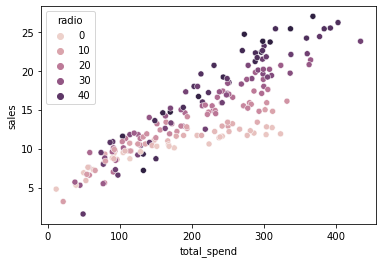

In [10]:
df = pd.read_csv('./Advertising.csv')

# taking all three independent features an combining it into one.
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

# plotting the linear between dependent and independent features.
sns.scatterplot(data=df,x='total_spend',y='sales',hue='radio')

Coefficients are theta_1 = 0.04868787931904818 and theta_0 = 4.243028216036325


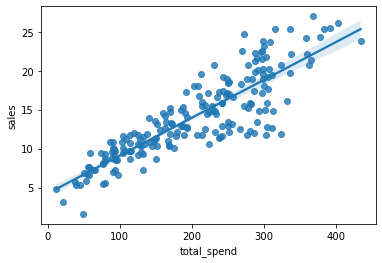

In [11]:
# Plotting regression plot
sns.regplot(data=df,x='total_spend',y='sales')

# Taking X(input) and y(output) to train our model
X = df['total_spend']
y = df['sales']

# y = mx+c (or) y = B1X+B0 -> This is degree one equation. Polyfit calculates the coeff 
theta_1, theta_0 = np.polyfit(X,y,deg=1)

print(f"Coefficients are theta_1 = {theta_1} and theta_0 = {theta_0}")

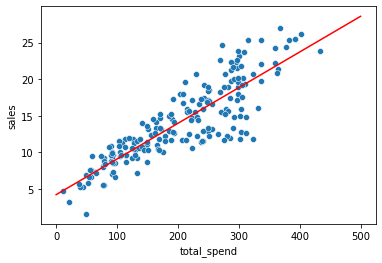

In [12]:
# generating some random sample data as test data
future_spend = np.linspace(0,500,100)

# predeicting the output sales based on input and coefficients calculated
predicted_sales = 0.04868788 * future_spend + (4.24302822)

sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(future_spend,predicted_sales,color='red')

__2. How we can calculate error in Linear regression ?__

- Common evaluation metrics for regression are :
    1. Mean Absolute Error (MAE)
    2. Mean Squared Error (MSE)
    3. Root Mean Square Error (RMSE)


- __Mean Absolute Error__
    - The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance.

    - MAE wont punish large errors. To do this, we can use MSE

    - MAE = __(1/n) * Σ | (actual – forecast) |__

- __Mean Squared Error__
    - In MSE, we first measure the distance(difference) of observed y-values from the predicted y-values at each value of x.

    - Followed by squaring these distances and finding their average.
    
    - MSE formula = __(1/n) * Σ(actual – forecast)^2__

    - The smaller the mean square, the closer we are to find the best fit line.

    - Issue with MSE is, units of y is changed to y^2.

- __Root Mean Square Error__

    - RMSE is the root of the mean of the sqaured errors.

    - RMSE = __sqrt((1/n) * Σ(actual – forecast)^2_)__

    - Now, what is the good value of RMSE ? Here, CONTEXT is everything.


![](./Images/regression_error_metrics.jpeg)


- __Differences among these evaluation metrics__

    - Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).


    - MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.


    - The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model


In [13]:
def calculateMAE(true, pred):
      return np.sum(np.abs(true - pred))

def calculateMSE(true, pred): 
  return np.sum((true - pred)**2)

3. Difference between Loss function and Cost Function ?

4. Difference between MSE and MAE and RMSE

5. How gradient descent works ?

## GRADIENT DESCENT:
- How to change the value of $\theta_0$ such that J($\theta_0$) is as minimum as possible ?

- To find the best values of $\theta_1$, we use __Gradient Descent__ also known as __CONVERGENCE ALGORITHM__.

- It is an __ITERATIVE__ process.

- This algorithm optimizes the Cost by changing the values of $\theta_1$ values.

- In simple words, we are automating the process of finding optimal coefficients.

- By taking small baby steps, Gradient Descent changes values of $\theta_0$ and $\theta_1$ such that they are moving towards the __minimial point__.

    1. $\theta_0$ = $\theta_0$ - $\alpha$ * $\frac{\partial}{\partial \theta_0}(J(\theta_0, \theta_1))$


    2. $\theta_1$ = $\theta_1$ - $\alpha$ * $\frac{\partial}{\partial \theta_1}(J(\theta_0, \theta_1))$

    - Here, $\alpha$ is called __LEARNING RATE__. Generally it is a small positive number. It controls how big each step should be while changing the coefficient values.

        ![](./Images/learning_gradiet.png)

    - The partial derivative term ($\frac{\partial}{\partial \theta_1}(J(\theta_0, \theta_1))$) of the Cost function tells in which direction should we move in order to reach the __minimal point__.

        ![](./Images/3-steps-of-a-Gradient-Descent-with-learning-decay-rate-a-starting-from-the-initial.png)

    ![](./Images/gradient_descent_assemblyai.png)

    - If the value of derivative is negative(-ve) it means the slope is also negative. So , we add the differntial value to the existing point such that we move closer to the local minima point.
    
        Ex: $\theta_0$ = $\theta_0$ - $\alpha$ * (-z)


    - If the value of derivative is postive(+ve) it means the slope is also positive. So , we substract the differntial value to the existing point such that we move closer to the local minima point.
    
        Ex: $\theta_0$ = $\theta_0$ - $\alpha$ * (+z)

    

    - If learning rate($\alpha$) is very high, then that corresponds to a very aggressive gradient descent procedure where huge steps are taken down the hill.

    - We repeat above steps(i.e changing values of ($\theta_0$ and $\theta_1$) until we reach a __CONVERGENCE__. It is point a local minimum where parameters $\theta_0$ and $\theta_1$ no longer change much with each step.

    - NOTE : We have to simultaneously update both $\theta_0$ and $\theta_1$ .

## INTUITION:
repeat until convergence {

$\theta_0$ = $\theta_0$ - $\alpha$ * $\frac{\partial}{\partial \theta_0}(J(\theta_0, \theta_1))$


$\theta_1$ = $\theta_1$ - $\alpha$ * $\frac{\partial}{\partial \theta_1}(J(\theta_0, \theta_1))$

}


If we have Simple Cost function with only one Variable($\theta_1), then

J($\theta_1$) => $\theta_1 = \theta_1 - \alpha* \frac{\partial}{\partial \theta_1}(J( \theta_1)) $

## LEARNING RATE:

- Selecting the value of '$\alpha$' is very crucial for Gradient Descent to work properly.

- If learning rate is small, the gradient descent will work but it will be very slow.

- If it is too large, gardient descent may overshoot and never reach the nminimum. It will fail to Converge.

![learning rate](./Images/learning_rate.png)

![](./Images/learning_rates_asssembltai.png)

- Few good values of learning rate to start with are 0.001, 0.01, 0.1, 1 and so on.



- How to know if we have reached the mimimum point ?

    -  At minimum tangent value i.e Slope = 0

        so , $\frac{\partial}{\partial \theta_1}(J( \theta_1))  = 0$. $\theta_1$ is unchanged.

    - As we get nearer to the local minimum, gradient descent will automatically take smaller steps.

    - Hence Near Local Minima,
        - Derivative becomes smaller
        - Update steps become smaller

6. Explain Indepth Mathematical Intitution and working of Linear Regression

## SIMPLE LINEAR REGRESSION:

- Linear Regression is a useful tool for predicting a quantitative response.


What is linear regressin?
- Linear Regression is a Supervised Machine Learning Model which pedicts a continuous value based on the given input features($X_1$, $X_2$, $X_3$, ....$X_n$)

- Linear Regression allows us to build a relationship between multiple features to estimate a target output.

- Linear Regression fits a line through the data sets.

![](./Images/liner_regression.jpeg)

- Say, we have details of a house like no of rooms, area, how many doors it has, etc. By taking these parameters as input features, we can predict the __COST ($y_0$)__ of the house.

__Simple Linear Regression ?__

- If the linear regression has only one independent and one dependent variable. Then it is called __SIMPLE__ or __UNIVARIATE__ Linear Regression.

- It assumes there is approximately a linear relationship between X(input) and Y(output).


- In this Regression model, the model genearates an equation of line. If it's an Univariate Regression, the equation will be __. $\hat{y}$ = $\beta_0 + \beta_1x$ .__

- The main aim of linear regression model is to determine the values of coefficients which can result in he best-fitted linear regression line.

- This can alsio be written as; $h_\theta(x) = \theta_0 + \theta_1(x)$ 
    - Where, 
        - $\theta_0$ = intercept 
        - $\theta_1$ = slope of the line (fitted line) 



!['Simple Linear Regression'](./Images/linear-regression-plot.jpeg)



- Here, we call this line as Best Fit Line.
- To decide if whether the predicted line is Best fit or not, we find the __ERROR__ using differeent methods. Line at which the error is minimum, we call it __BEST FIT LINE__

![](./Images/fig-2-simple-hypothesis.png)

- In above plot, we can see for different values of $\theta_1$ we are getting different lines. Among these we have to select the one with least errors.



- If we want to find the best fit line, we have to find(or change) the values of $\theta_0$ and $\theta_1$ till we reach to the point of __MINIMIUM ERROR__.



- Before moving ahead, lets see what is a slope? 
    - Slope is defined as ****change in y for one unit increase in X****

## How are we defining or finding the errors ?
 - Residual Error :
    - For some row j, residual error is $y^j$ - $\hat{y}^j$
        - Where $y^j$ -> Actual value; $\hat{y}^j$ -> Predicted Value

- Squared Error for row j :
    - $(y^j - \hat{y}^j)^2$

- Sum of Squared Error for __m__ rows
    - $\sum_{i=1}^{m} (y^j - \hat{y}^j)^2$


- Average Sqaured Error for __m__ rows
    - $\frac{1}{m} (\sum_{i=1}^{m} (y^j - \hat{y}^j)^2)$


## COST FUNCTION:
- Best fit line is found when Residual error is minimum.
- To find/ reduce the error, we use __COST FUNCTION__.
- Cost function tells how best a line fits.
- The squared error cost function is by far the most commonly used cost function for linear regression, and for all regression problems at large.
- A cost function is defined by some measure of error (Here we are taking __SQUARED ERROR__).
- Ultimately we have to minimize the cost function.

    - J($\theta_0,\theta_1$) = $\frac{1}{2m}(\sum_{i=1}^{m}(y^j - \hat{y}^j)^2$)
        - 
        

- We can minimixe the value of __COST FUNCTION__ by changing the values of intercept($\theta_0$) and SLope($\theta_1$).

- For simnpler calculation and 2D plot, let us take intercept($\theta_0 = 0$). It means our line is passing through the origin.
    - So, $h_\theta(x) = \theta_1 * x$

- Instead of changing values of te ocefficients manually, we use __GRADIENT DESCENT ALGOROTM__ to minimize the __COST FUNCTION__.

- When the cost ($J(\theta)$) is relatively samller(closer to zero), it means the model fits the data better than compared to other choixes of $\theta_0$.

- By assuming different values of $\theta_0$ and finding its respective Cost value. If we plot $\theta_0$ on X-axis and Cost($J(\theta_0)$) on Y-axis. We get an inverted bell curve.

![theta_1 vs cost funciton plot](./Images/fig-3-cost-function.png)

- Point where value of Cost is minimum (here it is $J(\theta) = 0$ at $\theta_1 = 1$) is called __GLOBAL MINIMUM__.

- So, at $\theta_1 = 1$ our Cost function ($J(\theta)$) is minimum. At this value our line will be best fitted.


- Instead of assuming $\theta_0 = 0$ for simpler understanding, if we had assumed both values then the kind of plot we would have generated is 
![cost_3d](./Images/3d_plot_cost.png)

7. Explain what the intercept term means ?

__8. Assumptions of Linear regression ?__

- Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis.

- There arew 4 assumptions associated with Linear Regression

    1. Linearity

    2. Homoscedasticity

    3. Independence 

    4. Normality

- __Linearity :__

    - Relation between dependent and independent variables should be linear

    - Linear relation can be tested using SCATTER PLOT.

- __Normality :__

    - For any fixed value of X, y is normally distributed.

    - This assumtion can be checked using HISTOGRAM or Q-Q PLOT.

    - When the data is not distributed, we can use a non-linear transformation (e.g log transformation) to fix the issue.

- __Independence :__

    - Obsrvations are independent of each other.

- __Homoscedasticity :__

    - The assumption of homoscedasticity (meaning “same variance”) is central to linear regression models.

    - The variance of residual is the same for any value of X.

    - Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

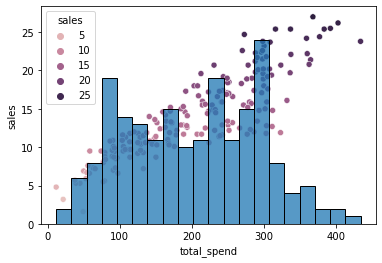

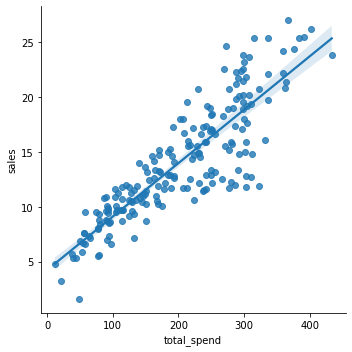

In [18]:
# assumption 1
sns.scatterplot(data=df, x='total_spend', y='sales', hue='sales')

# assumtion 2
sns.histplot(data=df, x='total_spend', bins=20)


sns.lmplot(x ="total_spend", y = "sales", data = df)

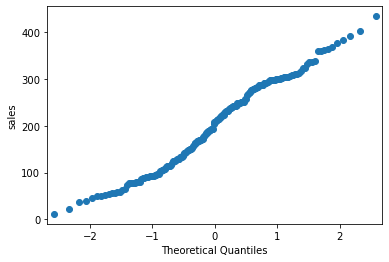

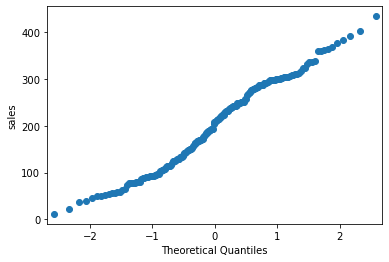

In [19]:
import statsmodels.api as sm
sm.qqplot(df["total_spend"], ylabel = "sales" )

__9. How hypothesis testing is used in Linear Regression ?__

- It is of utmost importance to determine if linear regression is the correct choice of model for our particular problem and this can be done by performing hypothesis testing related to linear regression response and predictor variables

- Key steps to perform Hypothesis Testing

    - Formulate a Hypothesis.

    - Determine the significance level.

    - Determine the type of test.
    
    - Calculate the Test Statistic values and the p values.
    
    - Make Decision.

- In simple linear regression, the t-statistic is used to determine the linearity based on the follwing conditions :

        NULL HYPOTHESIS : m(slope) = 0

        ALTERNATE HYPOTHESIS : m != 0

- A one-sample t-test will be used in linear regression to test the null hypothesis that the slope or the coefficient is equal to zero.

- In linear regression, the t-test is a statistical hypothesis testing technique that is used to test the linearity of the relationship between the response variable and different predictor variables. 

- In other words, it helps us dertermine whether or not there is a relation between independent and dependent variables.

- If slope(m) = 0, it indicates that there is no relation between dependent(y) and indpendent(X) features. So __NULL HYPOTHESIS__ will be true and the linear regression line will be a straight line paralle to X-axis.

![](./Images/true_null_t-test.png)

- A one-sample t-test will be used in linear regression to test the null hypothesis that the slope or the coefficients of the predictor variables is equal to zero. This test is used when the linear regression line is a straight line.

    The formula for the one-sample t-test statistic in linear regression is as follows:

    __t = (m – m0) / SE__

    Where:

    - t is the t-test statistic

    - m is the linear slope or the coefficient value obtained using the least square method

    - m0 is the hypothesized value of linear slope or the coefficient of the predictor variable. The value of m0 = 0.

    - SE represents the standard error of estimation which can be estimated using the following formula:

    - SE = S / √N

    - Where S represents the standard deviation and N represents the total number of data points

- Hence, A one-sample t-test will be used in linear regression to test the null hypothesis that the slope or the coefficient is equal to zero. In the case of the multiple regression model, the null hypothesis is that the coefficient of each of the predictor variables is equal to zero.

10. How would you decide the importance of Variable for the multivariate regression ?

__11. R^2 vs Adjusted R^2 ?__

- Once we have built our model, immediate next step is to determmine how accurate or efficiemt it is. To do so, we use __EVALUATION METRICS__.

- In Linear Regression, we use ***R-squared*** and ***Adjusted R-Squred*** to evaluate our model.

- Our regression model doesn't predict all the values perfectly.

- So, we determine the __Residuals__ of each individual data point. A residual is a distance between actual value and predicted value (i.e y-y^)

- Using the residual values, we can determine the sum of squares of the residuals also known as Residual sum of squares or RSS.

    - RSS = __Σ(actual – forecast)^2__
    

- The lower the value of RSS, the better is the model predictions. Or we can say that – a regression line is a line of best fit if it minimizes the RSS value. But there is a flaw in this, RSS is a scale variant statistic. Since RSS is the sum of the squared difference between the actual and predicted value, the value depends on the scale of the target variable.

- Now, lets understand about ***Total Sum of Squares***. 
    - Total variation in target variable is the sum of squares of the difference between the actual values and their mean.

    - TSS = __Σ(y – y_mean)^2__

    - TSS or Total sum of squares gives the total variation in Y. 


__R-SQAURED__:

- R-squared = (TSS-RSS)/RSS

            = Explained Variation / Total Variation

            = 1- (Unexplained variation/ Total variation)    

- So R-squared gives the degree of variability in the target variable that is explained by the model or the independent variables. If this value is 0.7, then it means that the independent variables explain 70% of the variation in the target variable.

- If my model is well fitted, then R-squared = 1 - (small number / bigger number) = small number

- A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa.

- But, R-Squared has a major flaw. No matter how many variables(Features) we add to our data, its value __never__ decreases. It means, even if we add any number of the __redundant__ features it won't affect its efficiency which is not right. Thus, here comes ***Adjusted R-Squared***


__ADJUSTED R-SQAURED__:

- The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.

    - Adjusted R squared = __1 - ( (1 - R^2) (N - 1) / N - p - 1 )__

    - Where

        - N = no of data points

        - P = no of independent features


- Adjusted R - squared calculaytes efficiency by considering only important faetures and removing __bias__ from the model.




